## Лабораторная работа №4

Постановка задачи:

1. Используя тестовые функции для оптимизации из лабораторной работы №1, применить фреймворк Optuna для поиска оптимальных гиперпараметров,
2. Выбрать алгоритм датасета из Scikit-Learn и применить Optuna. 

In [2]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 13.3 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=90344e92fcd1d4ee0f78fdb954200046e3dc8bc565a86960bb034cdf4add2e91
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  At

In [ ]:
import optuna
import numpy as np
import plotly

### Функция Матьяса
$$
f(x, y) = 0.26 (x^2 + y^2) - 0.48xy,
$$
<br>

In [ ]:
def MatyasFunc(x, y):
    return 0.26 * ((x ** 2) + (y ** 2)) - 0.48 * x * y

### Функция МакКормика
$$
f(x, y) = \sin(x + y) + (x - y)^2 - 1.5x + 2.5y + 1,
$$
<br>

In [ ]:
def McCormickFunc(x, y):
    return np.sin(x + y) + ((x - y) ** 2) - 1.5 * x + 2.5 * y + 1          

### Выборка гиперпараметров с плавающей запятой

In [ ]:
def objective(trial, func, x_low, x_high, y_low, y_high):
    x = trial.suggest_float("x", x_low, x_high)
    y = trial.suggest_float("y", y_low, y_high)
    return func(x, y)

### Вывод наилучших значений из выборки

In [ ]:
def op_print(study):
    print("Best x, y values: ", study.best_params)
    print("Best function value: ", study.best_value)

### Построение графиков

In [ ]:
def draw_contour(study):
    fig = optuna.visualization.plot_contour(study)
    fig.show()

def draw_history(study):
    fig = optuna.visualization.plot_optimization_history(study)
    fig.show()

### Функция Матьяса

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Формула:*</font>
<br>
$$
f(x, y) = 0.26 (x^2 + y^2) - 0.48xy,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Глобальный минимум:*</font>
<br>
$$
f(0, 0) = 0,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Метод поиска:*</font>
<br>
$$
-10\leq x,y\leq 10.
$$
<br>

### Выборка гиперпараметров для функции Матьяса

In [ ]:
study_matyas = optuna.create_study(study_name = "x=(-10,10), y=(-10,10)")
study_matyas.optimize(lambda t: objective(t, MatyasFunc, -10, 10, -10, 10), n_trials=300, show_progress_bar = True)

[I 2022-11-18 10:07:52,940] A new study created in memory with name: x=(-10,10), y=(-10,10)


  0%|          | 0/300 [00:00<?, ?it/s]

[I 2022-11-18 10:07:53,007] Trial 0 finished with value: 61.463975711012 and parameters: {'x': -7.301969433777725, 'y': 8.376350980594548}. Best is trial 0 with value: 61.463975711012.
[I 2022-11-18 10:07:53,011] Trial 1 finished with value: 9.122422105893992 and parameters: {'x': 5.631148207030103, 'y': -0.3152226040546875}. Best is trial 1 with value: 9.122422105893992.
[I 2022-11-18 10:07:53,020] Trial 2 finished with value: 0.7676020491399874 and parameters: {'x': -1.836820848339391, 'y': -0.1292522679858905}. Best is trial 2 with value: 0.7676020491399874.
[I 2022-11-18 10:07:53,030] Trial 3 finished with value: 8.032447825044624 and parameters: {'x': -4.616214146708502, 'y': -9.528164238478992}. Best is trial 2 with value: 0.7676020491399874.
[I 2022-11-18 10:07:53,038] Trial 4 finished with value: 0.3172572844624268 and parameters: {'x': -0.43428277091815204, 'y': 0.6910579764128215}. Best is trial 4 with value: 0.3172572844624268.
[I 2022-11-18 10:07:53,044] Trial 5 finished wi

### Наилучшие найденные значения

In [ ]:
op_print(study_matyas)

Best x, y values:  {'x': 0.10197519502431056, 'y': 0.10204950116178904}
Best function value:  0.0004162621468888194


### Визуализация параметров

In [ ]:
draw_contour(study_matyas)

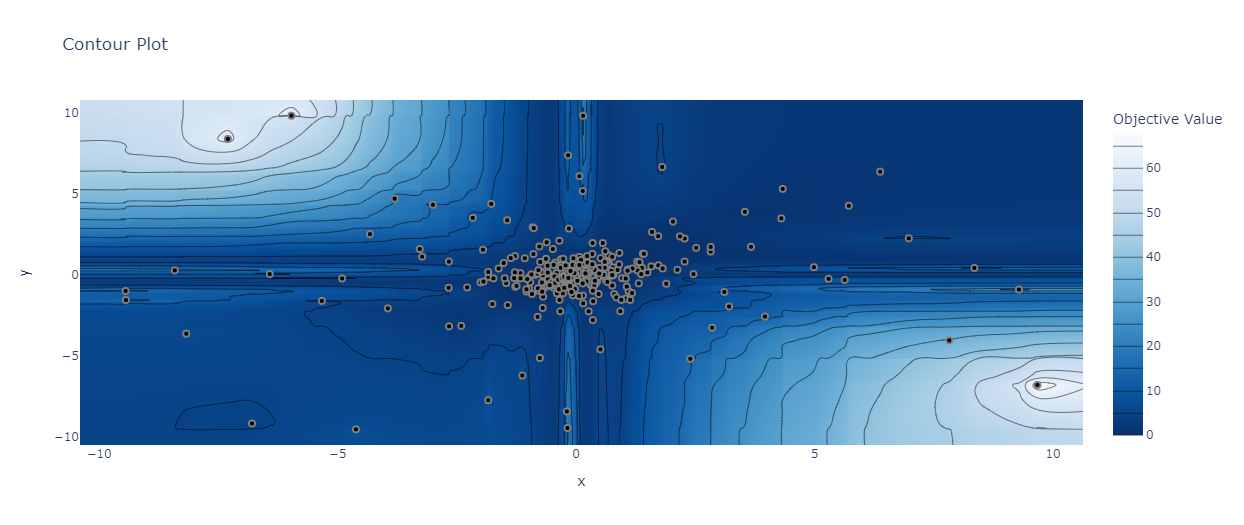

### График оптимизации истории всех испытаний в исследовании

In [ ]:
draw_history(study_matyas)

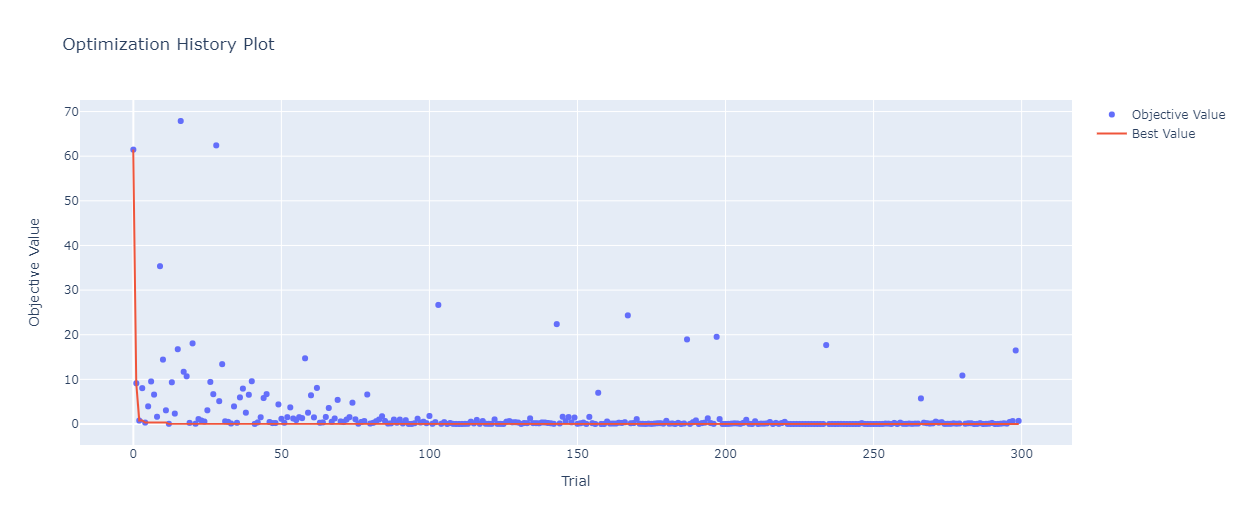

### Функция МакКормика

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Формула:*</font>
<br>
$$
f(x, y) = \sin(x + y) + (x - y)^2 - 1.5x + 2.5y + 1,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Глобальный минимум:*</font>
<br><br>
$$
f(-0.54719, -1.54719) = -1.91333,
$$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size = "3">*Метод поиска:*</font>
<br>
$$
-1.5\leq x\leq 4,
$$
$$
-3\leq y\leq 4,
$$
<br>

### Выборка гиперпараметров для функции МакКормика

In [ ]:
study_mccormick = optuna.create_study(study_name = "x=(-1.5,4), y=(-3,4)")
study_mccormick.optimize(lambda t: objective(t, McCormickFunc, -1.5, 4, -3, 4), n_trials=300, show_progress_bar = True)

[I 2022-11-18 10:16:54,467] A new study created in memory with name: x=(-1.5,4), y=(-3,4)
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/300 [00:00<?, ?it/s]

[I 2022-11-18 10:16:54,553] Trial 0 finished with value: 1.665740303275383 and parameters: {'x': 0.6558881871231099, 'y': -2.1978374969672485}. Best is trial 0 with value: 1.665740303275383.
[I 2022-11-18 10:16:54,558] Trial 1 finished with value: 3.8857190501444787 and parameters: {'x': 1.6063025834139344, 'y': 2.220337512811975}. Best is trial 0 with value: 1.665740303275383.
[I 2022-11-18 10:16:54,566] Trial 2 finished with value: 5.524677460045561 and parameters: {'x': 2.4335856499087147, 'y': -0.4687534960350166}. Best is trial 0 with value: 1.665740303275383.
[I 2022-11-18 10:16:54,578] Trial 3 finished with value: 17.046991251068516 and parameters: {'x': 0.9069277915410496, 'y': 3.8641645228848427}. Best is trial 0 with value: 1.665740303275383.
[I 2022-11-18 10:16:54,582] Trial 4 finished with value: 7.203718070191961 and parameters: {'x': 1.3809312418284585, 'y': -2.5736307783618777}. Best is trial 0 with value: 1.665740303275383.
[I 2022-11-18 10:16:54,590] Trial 5 finished w

### Наилучшие найденные значения

In [ ]:
op_print(study_mccormick)

Best x, y values:  {'x': -0.5215895981370593, 'y': -1.527052426303026}
Best function value:  -1.9122788454243507


### Визуализация параметров

In [ ]:
draw_contour(study_mccormick)

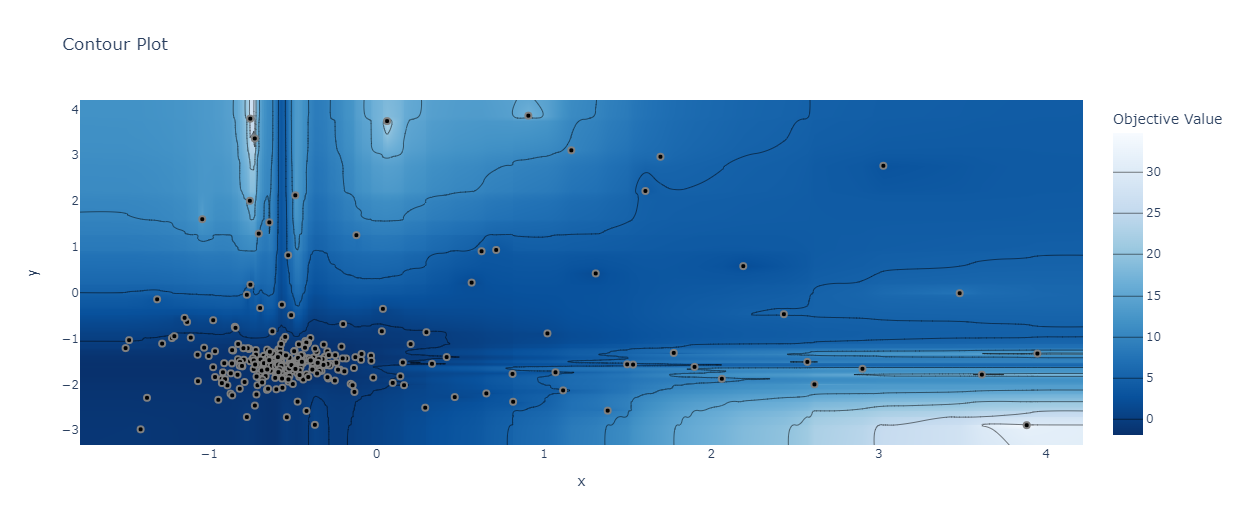

### График оптимизации истории всех испытаний в исследовании

In [ ]:
draw_history(study_mccormick)

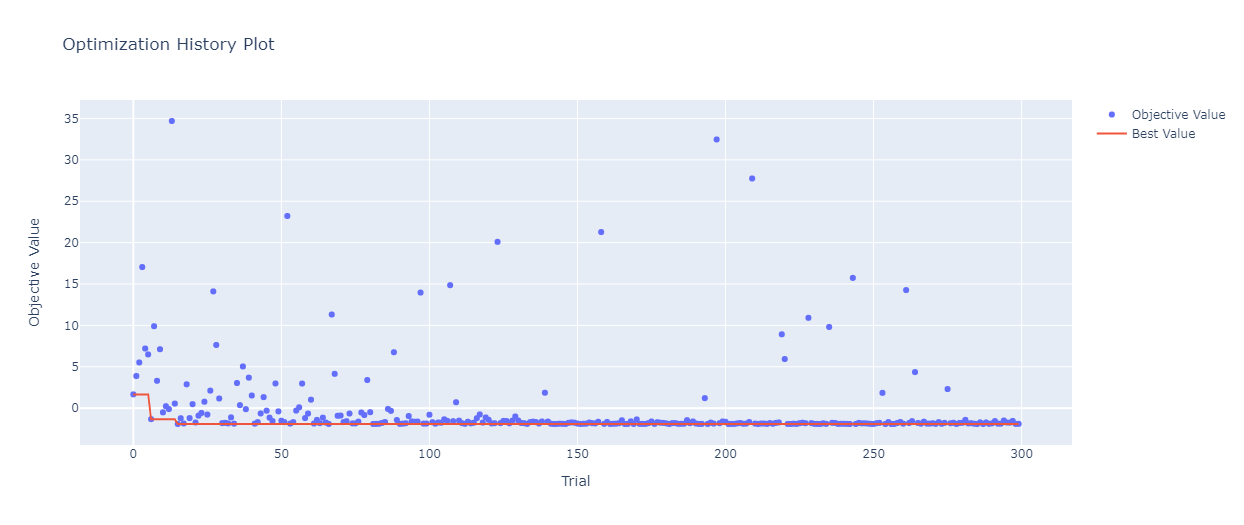

### График эмпирической функции распределения (EDF)

In [ ]:
fig = optuna.visualization.plot_edf([study_matyas, study_mccormick])
fig.show()

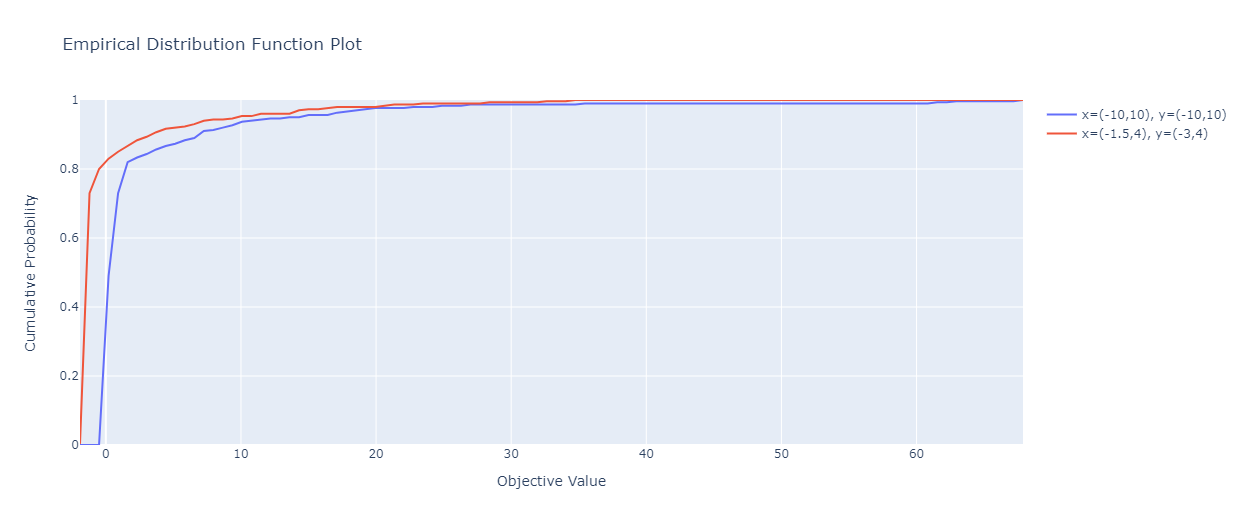

### Breast Cancer Wisconsin (Diagnostic) DataSet 

In [62]:
import optuna
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    digits = sklearn.datasets.load_breast_cancer()
    x, y = digits.data, digits.target
    max_depth = trial.suggest_int("rf_max_depth", 2, 64, log=True)
    max_samples = trial.suggest_float("rf_max_samples", 0.2, 1)
   
    rf_model = RandomForestClassifier(
        max_depth = max_depth,
        max_samples = max_samples,
        n_estimators = 50,
        random_state = 42)
    score = cross_val_score(rf_model, x, y,  cv=3).mean()
    return score

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial

[I 2023-01-14 19:08:20,203] A new study created in memory with name: no-name-b74fd499-98da-406a-9212-2e9277672126
[I 2023-01-14 19:08:20,493] Trial 0 finished with value: 0.9508029332590736 and parameters: {'rf_max_depth': 62, 'rf_max_samples': 0.40182191943071904}. Best is trial 0 with value: 0.9508029332590736.
[I 2023-01-14 19:08:20,803] Trial 1 finished with value: 0.9578297595841455 and parameters: {'rf_max_depth': 51, 'rf_max_samples': 0.9752458242063644}. Best is trial 1 with value: 0.9578297595841455.
[I 2023-01-14 19:08:21,097] Trial 2 finished with value: 0.959574863083635 and parameters: {'rf_max_depth': 40, 'rf_max_samples': 0.6966433377102357}. Best is trial 2 with value: 0.959574863083635.
[I 2023-01-14 19:08:21,377] Trial 3 finished with value: 0.9490485472941613 and parameters: {'rf_max_depth': 4, 'rf_max_samples': 0.5650457414495464}. Best is trial 2 with value: 0.959574863083635.
[I 2023-01-14 19:08:21,657] Trial 4 finished with value: 0.9508214981899193 and parameter

In [63]:
print("Best Score: ", study.best_trial.value)

print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

Best Score:  0.9631021999443052
Best Params: 
  rf_max_depth: 35
  rf_max_samples: 0.9986965398204033


In [64]:
optuna.visualization.plot_contour(study)

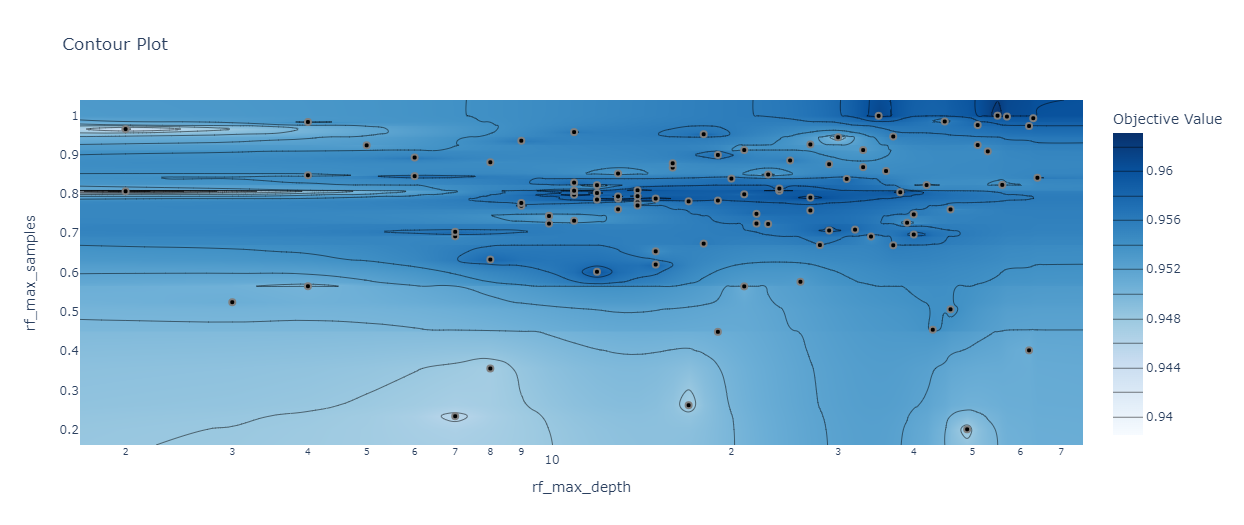

In [65]:
optuna.visualization.plot_optimization_history(study)

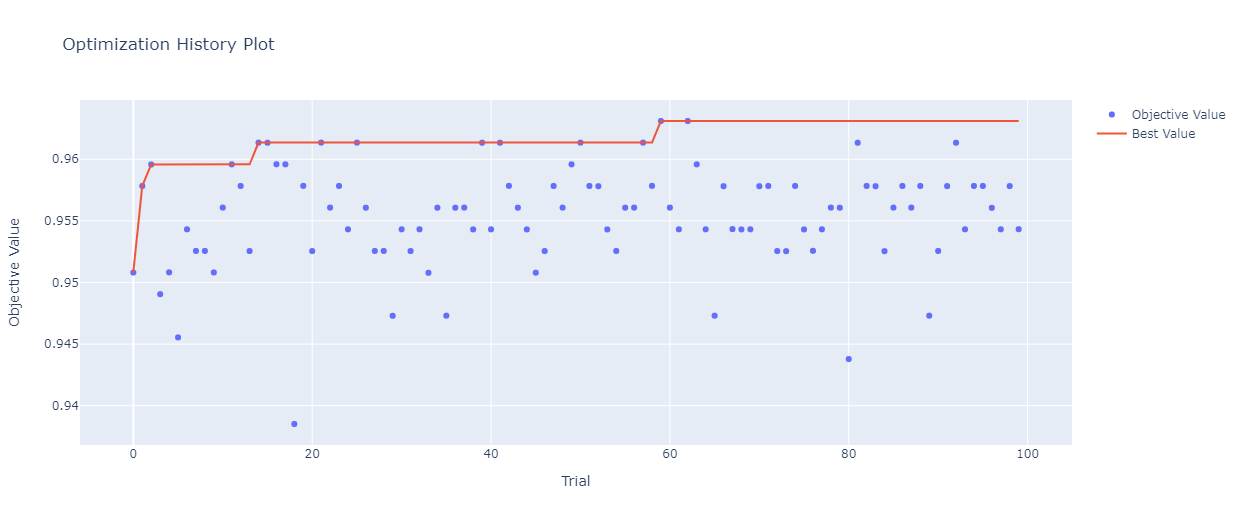